In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\doshi\Downloads\movie_rating.csv", encoding='latin1')

In [2]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [3]:
df.shape  # Shape of Dataset

(15509, 10)

In [4]:
#Checking Duplicate Data
df.duplicated().sum()

6

In [5]:
# Removing Duplicated Data
df.drop_duplicates(inplace=True)
df.shape

(15503, 10)

In [6]:
df.isnull().sum()  # Checking Null Data

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [7]:
df.info()  # Checking datatype of Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  object 
 2   Duration  7239 non-null   object 
 3   Genre     13627 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14979 non-null  object 
 7   Actor 1   13888 non-null  object 
 8   Actor 2   13122 non-null  object 
 9   Actor 3   12363 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


# Data Cleaning & Preprocessing

In [8]:
df["Name"].unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

In [9]:
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [10]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [11]:
df["Name"].unique()

array([' ', 'Gadhvi ', 'Homecoming', ..., 'Zulmi Raj', 'Zulmi Shikari',
       'Zulm-O-Sitam'], dtype=object)

In [12]:
df=df[df["Name"]!=' ']

In [13]:
df1=df[df.iloc[:, 1:9].isna().all(axis=1)]
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.shape

(8, 10)

In [15]:
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [16]:
df.shape

(5680, 10)

In [17]:
df.isnull().sum()

Name         0
Year         0
Duration     0
Genre       29
Rating       0
Votes        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
dtype: int64

In [18]:
# Filling Missing Values
df["Genre"].fillna(df["Genre"].mode()[0],inplace=True)
df["Rating"]=df["Rating"].astype("float64")

In [19]:
df["Year"].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(1994)', '(2003)',
       '(1998)', '(1979)', '(1974)', '(2015)', '(2006)', '(1981)',
       '(2020)', '(1985)', '(2013)', '(2011)', '(2007)', '(1988)',
       '(1987)', '(2008)', '(1999)', '(1973)', '(1968)', '(1982)',
       '(1977)', '(1950)', '(1969)', '(1948)', '(1990)', '(1989)',
       '(2001)', '(2000)', '(1953)', '(1978)', '(1963)', '(1992)',
       '(1976)', '(1984)', '(1986)', '(1966)', '(1975)', '(1980)',
       '(1967)', '(1970)', '(1952)', '(1972)', '(1971)', '(1964)',
       '(1954)', '(1962)', '(1957)', '(1965)', '(1996)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1934)',
       '(1947)', '(1931)', '(1943)', '(1933)', '(1944)', '(193

In [20]:
def edit_time(text):
    year=text.strip("()")
    return(year)
df["Year"]=df["Year"].apply(edit_time)

In [21]:
df["Duration"].value_counts()

120 min    169
135 min    148
130 min    141
140 min    135
150 min    133
          ... 
223 min      1
46 min       1
201 min      1
247 min      1
250 min      1
Name: Duration, Length: 174, dtype: int64

In [22]:
def edit_time(text):
    time=text.split(" ")
    return(time[0])
df["Duration(min)"]=df["Duration"].apply(edit_time)
df["Duration(min)"]=df["Duration(min)"].astype("int64")
df.drop(["Duration"],axis=1,inplace=True)

In [23]:
# Checking Duplicate Value by name and year
df2=df.groupby(["Name","Year"]).filter(lambda x: len(x)>1)
df2.head(15)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(min)
6062,India's Daughter,2015,"Documentary, Biography, Crime",8.2,"1,998",Leslee Udwin,Asha Devi,Badri Singh,Satendra,63
6063,India's Daughter,2015,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash,120
6217,ISIS,2017,Action,6.4,18,Yuvraj Kumar,Amrityan,Moshin Bhat,Snighdadeep Chatterji,92
6219,ISIS,2017,Action,7.5,8,Yuvraj Kumar,Yuvraj Kumar,Manon Faure,Rasheed Naz,135
8401,M,2014,"Drama, Romance",3.9,14,Suresh Jain,Seema Dogra,Paras Sharma,Sushma Sharma,118
8402,M,2014,"Drama, Musical",5.1,110,Saahil Prem,Saahil Prem,Amy Maghera,Salah Benlemqawanssa,125
9542,Mr,1996,Comedy,5.4,332,Bhagyaraj,Anil Kapoor,Sridevi,Nagarjuna Akkineni,140
9546,Mr,1987,"Action, Comedy, Drama",7.8,"14,451",Shekhar Kapur,Anil Kapoor,Sridevi,Amrish Puri,179
9560,Mr,1996,"Action, Comedy, Romance",5.5,161,K.S. Ravi,Prabhu Deva,Shilpa Shetty Kundra,Madhoo,162
9568,Mr,1987,Fantasy,7.0,5,Khwaja Ahmad Abbas,Amol Palekar,Shabana Azmi,Tom Alter,120


In [24]:
df2.shape

(12, 10)

In [25]:
# Removing duplicate value from data
df=df.drop_duplicates(subset=["Name"],keep=False)

In [26]:
df.shape

(4989, 10)

# Data Visualisation

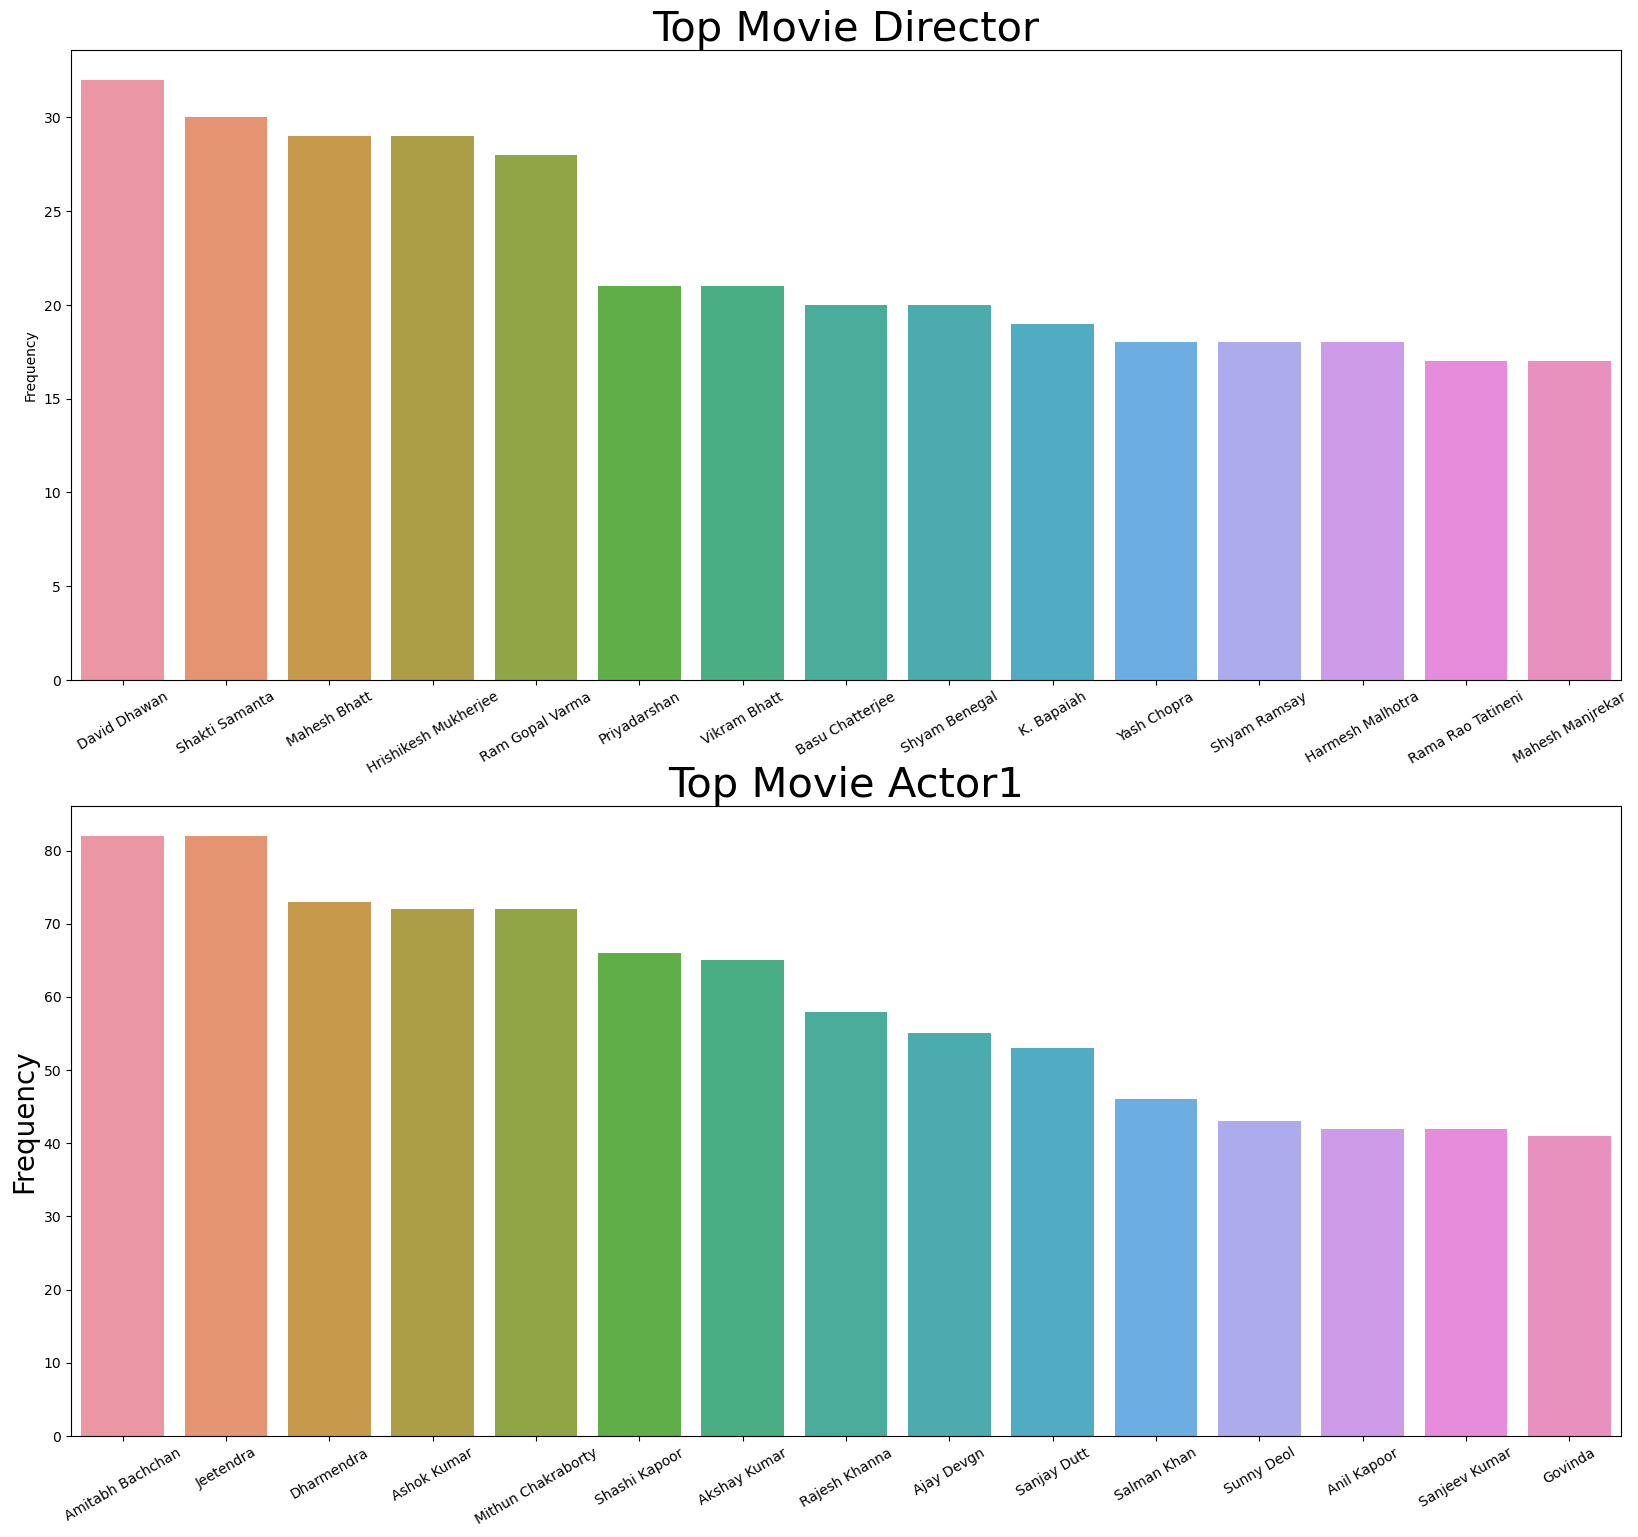

In [27]:
plt.figure(figsize=(20,18))
plt.subplot(2,1,1)
sns.barplot(x=df["Director"].value_counts()[:15].index,y=df["Director"].value_counts()[:15].values,data=df)
plt.xticks(rotation=30,fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Top Movie Director",fontsize=30)

plt.subplot(2,1,2)
sns.barplot(x=df["Actor 1"].value_counts()[:15].index,y=df["Actor 1"].value_counts()[:15].values,data=df)
plt.xticks(rotation=30,fontsize=10)
plt.ylabel("Frequency",fontsize=20)
plt.title("Top Movie Actor1",fontsize=30)

plt.show()

Text(0.5, 1.0, 'Top Movie Actor3')

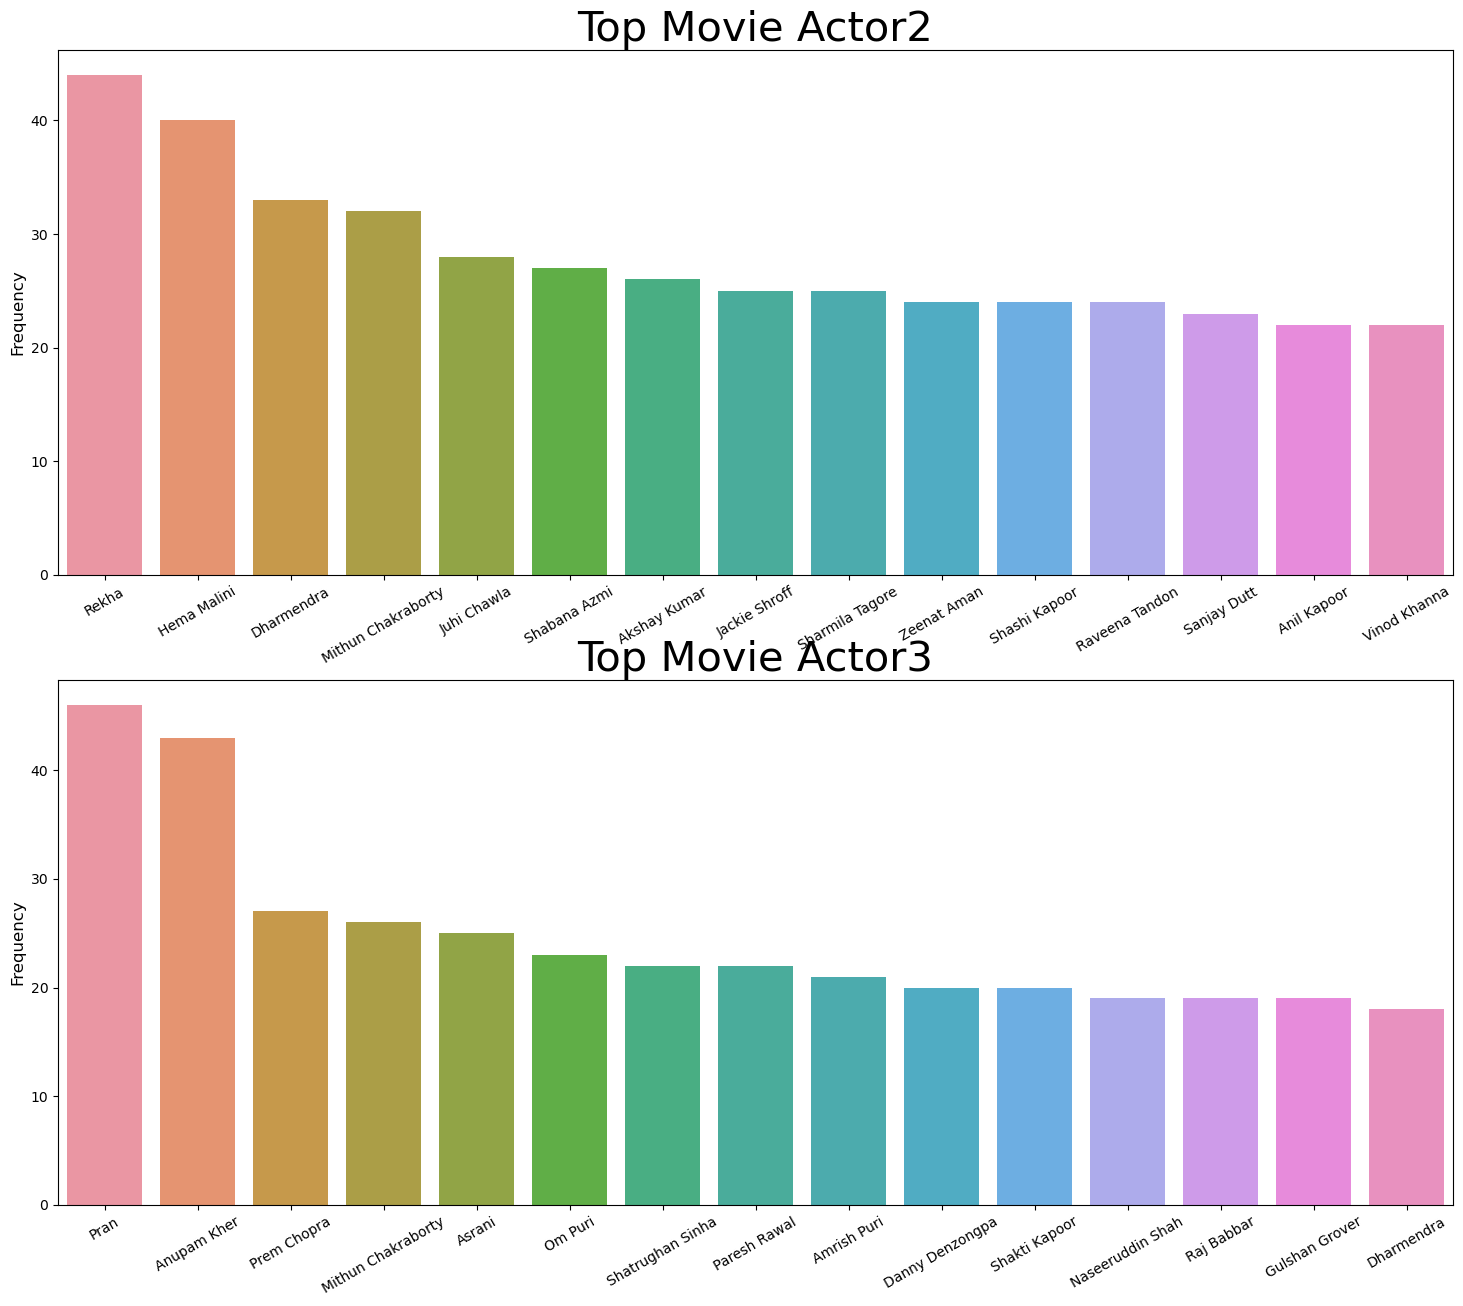

In [28]:
plt.figure(figsize=(18,15))
plt.subplot(2,1,1)
sns.barplot(x=df["Actor 2"].value_counts()[:15].index,y=df["Actor 2"].value_counts()[:15].values,data=df)
plt.xticks(rotation=30)
plt.ylabel("Frequency",fontsize=12)
plt.title("Top Movie Actor2",fontsize=30)

plt.subplot(2,1,2)
sns.barplot(x=df["Actor 3"].value_counts()[:15].index,y=df["Actor 3"].value_counts()[:15].values,data=df)
plt.xticks(rotation=30)
plt.ylabel("Frequency",fontsize=12)
plt.title("Top Movie Actor3",fontsize=30)

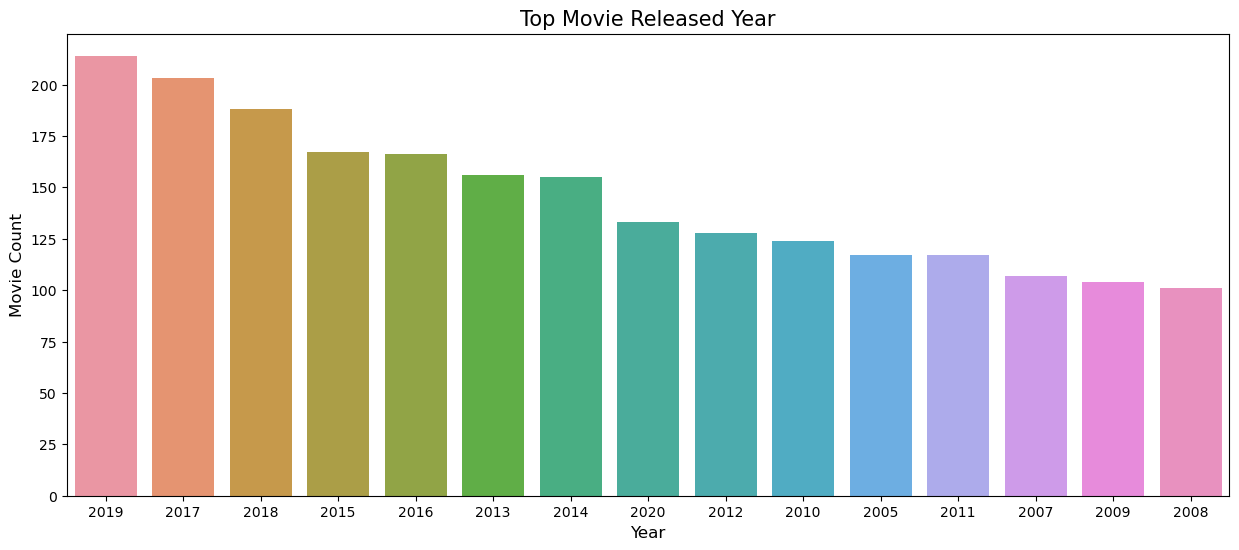

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["Year"].value_counts()[:15].index,y=df["Year"].value_counts()[:15].values,data=df)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Movie Count",fontsize=12)
plt.title("Top Movie Released Year",fontsize=15)
plt.show()

C:\Users\doshi\AppData\Local\Temp\ipykernel_23632\4137819965.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Duration(min)"],kde=False,norm_hist=True)


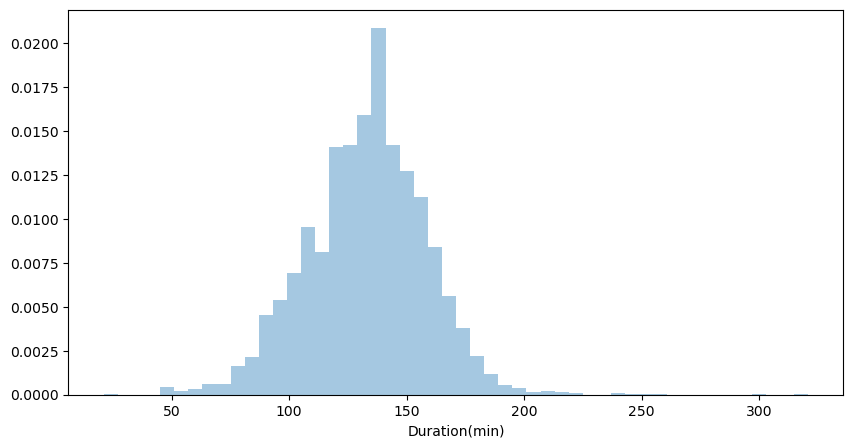

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df["Duration(min)"],kde=False,norm_hist=True)
plt.show()

C:\Users\doshi\AppData\Local\Temp\ipykernel_23632\793941756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"],kde=False,norm_hist=True)


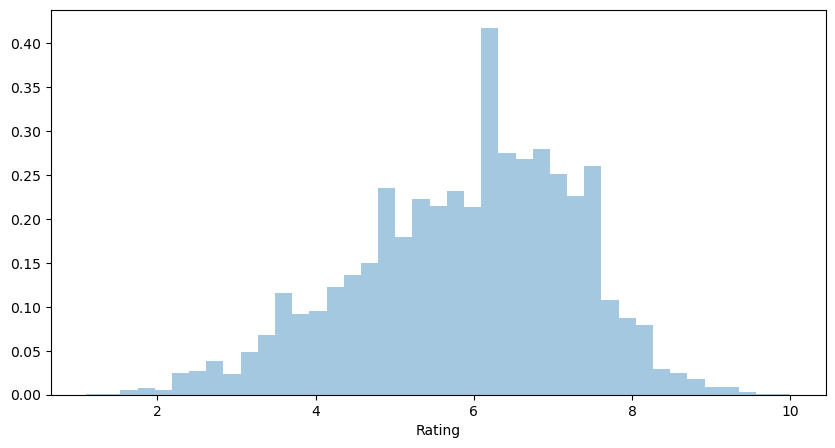

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df["Rating"],kde=False,norm_hist=True)
plt.show()

C:\Users\doshi\AppData\Local\Temp\ipykernel_23632\605218390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Year"],kde=False,norm_hist=True)


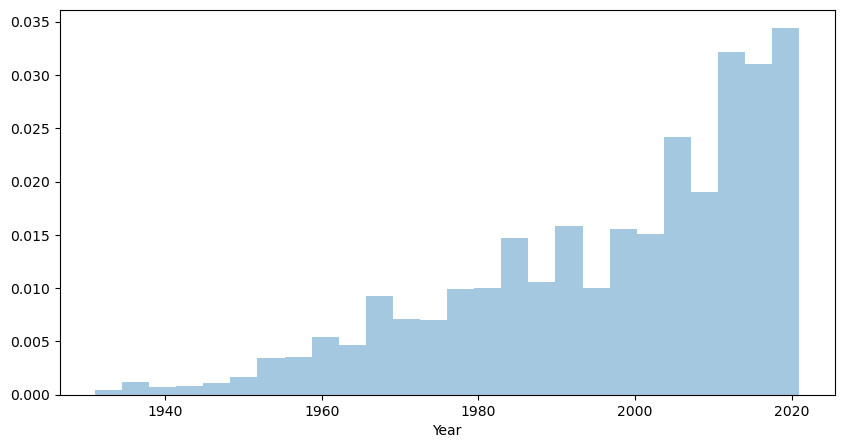

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df["Year"],kde=False,norm_hist=True)
plt.show()

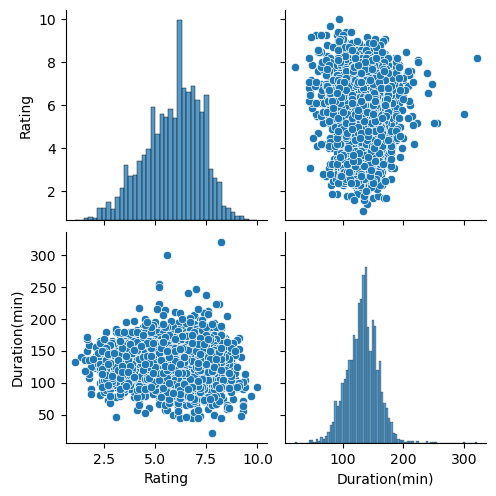

In [33]:
sns.pairplot(data=df)
plt.show()

In [34]:
df.head(8)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(min)
1,Gadhvi,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
3,Yaaram,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110
5,Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147
6,Yahaan,2005,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142
8,A Question Mark,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82
9,Andheri,2014,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,116
10,An Ode to Lost Love,2004,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96
11,Ek Tera Saath,2016,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120


In [35]:
df.drop(["Name","Year","Votes","Duration(min)"],axis=1,inplace=True)

In [36]:
df.head(2)

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [37]:
# Encoding categorical variables based on mean ratings

In [38]:
genre_mean_encode=df.groupby(df["Genre"])["Rating"].mean().to_dict()
df["Genre(mean encode)"]=df["Genre"].map(genre_mean_encode)
director_mean_encode=df.groupby(df["Director"])["Rating"].mean().to_dict()
df["Director(mean encode)"]=df["Director"].map(director_mean_encode)
actor1_mean_encode=df.groupby(df["Actor 1"])["Rating"].mean().to_dict()
df["Actor 1(mean encode)"]=df["Actor 1"].map(actor1_mean_encode)
actor2_mean_encode=df.groupby(df["Actor 2"])["Rating"].mean().to_dict()
df["Actor 2(mean encode)"]=df["Actor 2"].map(actor2_mean_encode)
actor3_mean_encode=df.groupby(df["Actor 3"])["Rating"].mean().to_dict()
df["Actor 3(mean encode)"]=df["Actor 3"].map(actor3_mean_encode)

In [39]:
df.head(3)

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre(mean encode),Director(mean encode),Actor 1(mean encode),Actor 2(mean encode),Actor 3(mean encode)
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.420152,7.000000,6.850000,7.000000,7.000000
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.690000,4.400000,5.420000,4.400000,4.450000
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.175000,5.046154,4.885714,5.807692,5.872727


In [40]:
input_data=df[["Genre(mean encode)","Director(mean encode)","Actor 1(mean encode)","Actor 2(mean encode)","Actor 3(mean encode)"]]
output_data=df["Rating"]

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.20,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(79.4482784509632, 78.09591610728994)

In [43]:
cv=cross_val_score(LinearRegression(),input_data,output_data,cv=2)*100
min(cv),max(cv)

(78.6349746168268, 79.68334758002979)

In [44]:
la=Lasso(alpha=0.10)
la.fit(x_train,y_train)
la.score(x_train,y_train)*100,la.score(x_test,y_test)*100

(78.70031585629246, 76.97645023178485)

In [45]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(criterion="squared_error",splitter="best",ccp_alpha=0.01)
dc.fit(x_train,y_train)
dc.score(x_train,y_train)*100,dc.score(x_test,y_test)*100

(74.46253202648161, 69.57406554919987)

In [46]:
cv=cross_val_score(DecisionTreeRegressor(criterion="squared_error",splitter="best"),input_data,output_data,cv=2)*100
min(cv),max(cv)

(59.01678479198045, 65.35141922245309)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=80,criterion="squared_error",max_depth=2)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)*100,rfr.score(x_test,y_test)*100

(64.9445510889721, 61.70282829366903)

In [57]:
cv=cross_val_score(RandomForestRegressor(n_estimators=50,criterion="squared_error"),input_data,output_data,cv=2)*100
min(cv),max(cv)

(79.35035209558039, 80.87938307981096)

In [56]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=80,criterion="squared_error",max_depth=2),n_estimators=100,learning_rate=0.5)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)*100,abr.score(x_test,y_test)*100

(74.52254871293998, 71.97610446280514)

In [58]:
cv=cross_val_score(AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=80,criterion="squared_error",max_depth=2),n_estimators=100,learning_rate=0.5),input_data,output_data,cv=2)*100
min(cv),max(cv)

(72.49133975265268, 72.71089756916768)

In [59]:
from sklearn.svm import SVR
svr=SVR(kernel="linear",C=1.0)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100,svr.score(x_test,y_test)*100

(79.19363400047943, 77.5777098554115)

In [50]:
cv=cross_val_score(SVR(kernel="rbf",C=1.0),input_data,output_data,cv=2)*100
min(cv),max(cv)

(80.60730562075706, 81.67172963795424)

In [51]:
input_data.head(5)

,Genre(mean encode),Director(mean encode),Actor 1(mean encode),Actor 2(mean encode),Actor 3(mean encode)
1,6.420152,7.000000,6.850000,7.000000,7.000000
3,5.690000,4.400000,5.420000,4.400000,4.450000
5,6.175000,5.046154,4.885714,5.807692,5.872727
6,7.350000,7.383333,5.444444,6.933333,6.657143
8,5.342857,5.600000,5.600000,5.883333,5.600000


In [52]:
output_data.head(5)

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [60]:
f=pd.DataFrame({"Test":y_test,"Prediction":svr.predict(x_test)})
f

,Test,Prediction
5684,6.3,6.439777
4757,6.2,6.403358
5127,3.6,4.829414
3357,3.9,4.600823
13295,6.9,4.594354
...,...,...
7767,4.2,4.286190
15089,4.6,5.357891
15235,4.4,5.028099
524,4.4,3.992396


In [61]:
data = {'Genre(mean encode)': [5.3], 'Director(mean encode)': [5.6], 'Actor 1(mean encode)': [5.6], 'Actor 2(mean encode)': [5.80], 'Actor 3(mean encode)': [5.60]}
df = pd.DataFrame(data)
prediction=svr.predict(df)
print("Predicted Rating of movie: ",prediction)

Predicted Rating of movie:  [5.53058599]
